# Regression


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.interpolate import CubicSpline
%matplotlib inline

In [2]:
def myLagrangeInterp(x,datax,datay):
    #build Lagrange interpolating polynomial through xdata , ydata
    #evaluated at point x
    N = len(datax)
    s = 0.
    for i in range(0,N):
        prod = datay[i]
        for j in range(0,N):
            if (i != j):
                prod*= (x-datax[j])/(datax[i]-datax[j])
                
        s+= prod
    return(s)


### Read in data from file 
There are many ways to read in a file with python. Here we'll use the [loadtxt](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) command in the numpy library to read in data from a tensile load test that gives data relating the stress on a steel wire and its elongation (or strain). The data will be saved right to a numpy array with this function. 
- Download the wire_stress_strain.csv file from Canvas and save it to your working directory. 
- Open it in a text editor or MS Excel.
- Open the file using loadtxt.
- Plot the data.
- Plot an interpolation of the data.
- Is there an interpolation we should use over another? Is interpolation the right method here?


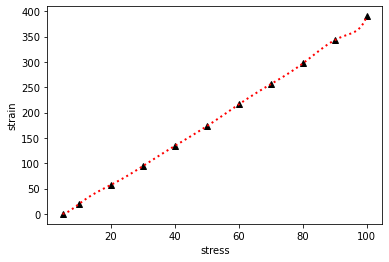

In [3]:
tldata = np.loadtxt('./wire_stress_strain.csv',delimiter=',',skiprows=1)
stressdata = tldata[:,0]
straindata = tldata[:,1]

plt.plot(stressdata,straindata,'k^');
plt.xlabel('stress');
plt.ylabel('strain');

#what is strain if stress is 53?
ss = np.linspace(min(stressdata),max(stressdata),101)
newstrains = myLagrangeInterp(ss,stressdata,straindata)
plt.plot(ss,newstrains,'r:',linewidth=2);
#strain53 = myLagrangeInterp(53,stressdata,straindata)
#print(f"The strain at stress = 53 is: {strain53} .")

Interpolation doesn't seem correct here. There is the obvious wiggle in the upper right part of the graph that doesn't match our engineering/scientific common sense.

In [4]:
print(np.corrcoef(stressdata,straindata))

[[1.         0.99945431]
 [0.99945431 1.        ]]


### Let's do a line of best fit
This is also called linear regression.

We can derive the line of best fit in many ways using calculus or linear algebra.

In [5]:
#do a derivation and calculation

### built in command polyfit in the numpy library
There are many built-in commands that do linear regression. Some have more bells and whistles than others with what they report about statistics, etc., buut we'll stick with the [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) command for now. We don't need to import any new command or libraries for this.

In [6]:
m, b = np.polyfit(stressdata,straindata,deg=1)
print(m, b)

4.069330453563715 -25.407127429805577


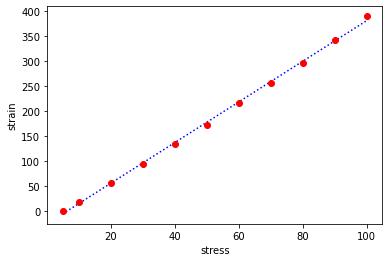

In [7]:
ss = np.linspace(min(stressdata),max(stressdata),101)
fitstrains = m*ss + b

plt.plot(ss,fitstrains,'b:',stressdata,straindata,'ro');
plt.xlabel('stress');
plt.ylabel('strain');


### Ceramics Example

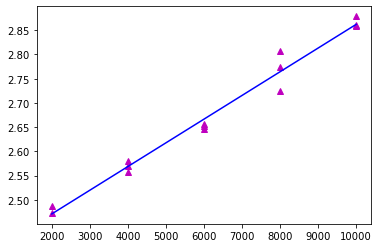

In [17]:
ceramicsdata = np.loadtxt('./ceramic_density.csv',delimiter=',',skiprows=5)
pressuredata = ceramicsdata[2:len(ceramicsdata),0]
densitydata = ceramicsdata[2:len(ceramicsdata),1]

pressuredata = np.append(pressuredata,[ceramicsdata[0,0]])
densitydata = np.append(densitydata,[ceramicsdata[0,1]])

plt.plot(pressuredata,densitydata,'m^');

m, b =np.polyfit(pressuredata,densitydata,deg=1)
def regline(x):
    return(m*x+b)

xs =np.linspace(2000,10000,101)
plt.plot(xs,regline(xs),'b');


### Windmill example
A research engineer is investigating the use of a windmill to generate electricity and has collected data on the DC output from this windmill and the corresponding wind velocity.

- Read the data from the file Windmill.xlsx or manipulate it.
- Plot the data and a line of best fit.
- Add the equation of the line to the figure.
- What issues are there with this approach?

In [9]:
windmilldata = np.loadtxt("Windmill.csv",delimiter=",",skiprows=1)

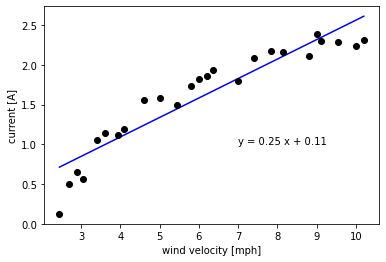

In [30]:
wdata= windmilldata[:,0]
dcdata = windmilldata[:,1]

m,b = np.polyfit(wdata,dcdata,deg=1)

ws = np.linspace(min(wdata),max(wdata),101)
dcs = m*ws + b


plt.plot(ws,dcs,'b',wdata,dcdata,'ko');
plt.xlabel('wind velocity [mph]');
plt.ylabel('current [A]');
plt.text(7,1,f"y = {m:1.2} x + {b:1.2}");



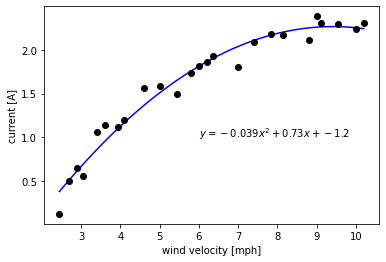

In [27]:
wdata= windmilldata[:,0]
dcdata = windmilldata[:,1]

c, m , b = np.polyfit(wdata,dcdata,deg=2)
#y = cx^2 + mx + b

ws = np.linspace(min(wdata),max(wdata),101)
dcs = c*ws**2 + m*ws + b


plt.plot(ws,dcs,'b',wdata,dcdata,'ko');
plt.xlabel('wind velocity [mph]');
plt.ylabel('current [A]');
plt.text(6,1,f"$y = {c:1.2} x^2 + {m:1.2} x + {b:1.2}$");


### Sales data

Consider a situation where we are selling widgets for price $x$. If we sell widgets for price $x$ then we can make a profit $P$. If the price decreases, we can sell more, but we get less for each widget. If we raise the price, we sell less, but we get more for each widget. We have sale data below. What is the relationship between price and profit? How can we use this?

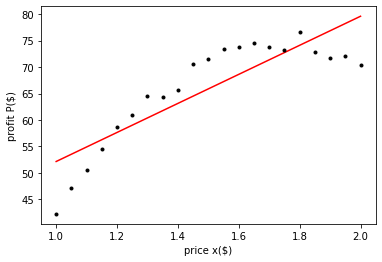

In [38]:
x = np.array([1.,   1.05, 1.1,  1.15, 1.2,  1.25, 1.3,  
              1.35, 1.4,  1.45, 1.5,  1.55, 1.6,  1.65,
              1.7,  1.75, 1.8,  1.85, 1.9,  1.95, 2.  ])
P = np.array([42.26, 47.18, 50.58, 54.61, 58.76, 61.04, 64.46,
              64.43, 65.69, 70.66, 71.46, 73.40, 73.81, 74.58,
              73.76, 73.32, 76.59, 72.82, 71.73, 72.04, 70.36])

m , b = np.polyfit(x,P,deg=1)
#y = cx^2 + mx + b

xs = np.linspace(min(x),max(x),101)
Ps =  m*xs + b


plt.plot(xs,Ps,'r',x,P,'k.');
plt.xlabel('price x($)');
plt.ylabel('profit P($)');
#plt.text(1.3,55,f"$y = {c:1.2} x^2 + {m:1.2} x + {b:1.2}$");

### checking residuals
Calculate the residuals for a linear regression above and plot these against $x$.

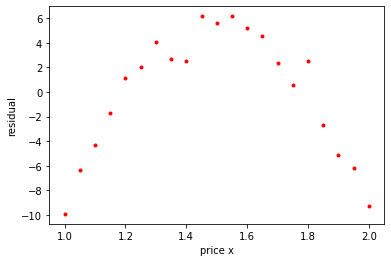

In [39]:
residuals = np.zeros(len(x))
for i in range(0,len(residuals)):
    #residual = actual - predicted   i.e. error
    residuals[i] = P[i] - (m*x[i]+b)

plt.plot(x,residuals,'r.');
plt.xlabel('price x');
plt.ylabel('residual');

### Load Cell Calibration
This example illustrates the construction of a regression model for load cell data that relates a known load applied to a load cell to the deflection of the cell. The model is then used to calibrate future cell readings associated with loads of unknown magnitude.

- Read the data in from load_cell.csv.
- Plot the data.
- Calculate a correlation.
- Find the linear fit.
- Plot the data and linear fit.
- Explain if the regression is good or if something else is needed.
 - Do something else if needed.

[[1.         0.99999426]
 [0.99999426 1.        ]]


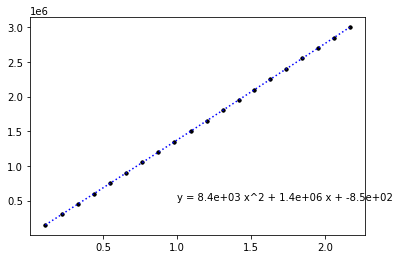

In [51]:
data = np.loadtxt("load_cell.csv",delimiter=",",skiprows=25)
plt.plot(data[:,0],data[:,1],'k.');

print(np.corrcoef(data[:,0],data[:,1]))

c, m, b = np.polyfit(data[:,0],data[:,1],deg=2)

plt.text(1.,0.5e6,f"y = {c:1.2} x^2 + {m:1.2} x + {b:1.2}");

xs = np.linspace(min(data[:,0]),max(data[:,0]),1001)
ys = c*xs**2 + m*xs + b

plt.plot(xs,ys,'b:');

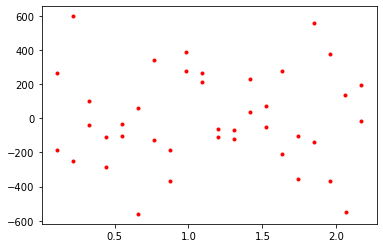

In [52]:
residuals = np.zeros(len(data[:,0]))
for i in range(0,len(residuals)):
    #residual = actual - predicted   i.e. error
    residuals[i] = data[i,1] - (c*data[i,0]**2 + m*data[i,0]+b)

plt.plot(data[:,0],residuals,'r.');
